In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, AvgPool2D, Dense, Flatten
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.layers import Resizing
from tensorflow.keras import Sequential

# Estas librerias las importo para descargar imagenes de urls
# Puede no funcionar con todas las paginas porque estas pueden no darte permiso para usar sus imagenes
import requests
from PIL import Image
from io import BytesIO

In [2]:
# Nombre de la carpeta donde se encuentran las subcarpetas con los dedos ya orenados
train_dir = 'dedos'

# Cargar el conjunto de datos de imágenes desde el directorio.
dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',  # Inferir las etiquetas de los nombres de los subdirectorios.
    # label_mode='binary',  # 'binary' para clasificación binaria (perros vs. gatos).
    # batch_size=32,  # Tamaño del lote (batch).
    image_size=(128,128),  # Tamaño al que se redimensionarán las imágenes.
    shuffle=True,  # Barajar el conjunto de datos.
    seed=123,  # Semilla aleatoria para reproducibilidad.
    validation_split=0.2,  # Fracción de los datos para usar como conjunto de validación.
    subset='training',  # 'training' para conjunto de entrenamiento, 'validation' para conjunto de validación.
)

Found 3600 files belonging to 6 classes.
Using 2880 files for training.


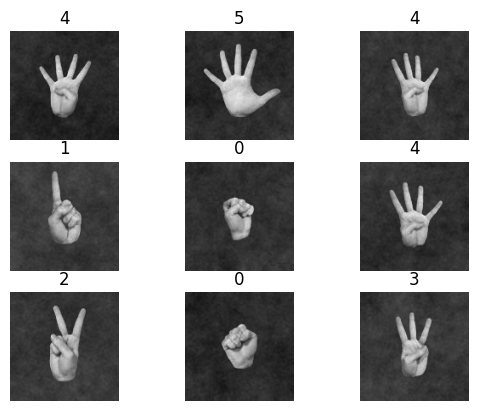

In [3]:
class_names = dataset.class_names

# Mostramos varias imagenes con su numero correspondiente de dedos
for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])])
        plt.axis("off")

In [4]:
# Obtener los nombres de las clases del dataset
class_names = dataset.class_names

# Crear listas vacías para almacenar imágenes y etiquetas
X = []  # Lista de imágenes
y = []  # Lista de etiquetas

# Iterar a través del dataset
for images, labels in dataset:
    # Agregar imágenes y etiquetas a las listas
    X.extend(images.numpy())
    y.extend(labels.numpy())  # Agregar directamente las etiquetas numéricas

# Convertir las listas a arrays numpy
X = np.array(X)
y = np.array(y)

# Imprimir las dimensiones de X y y para verificar
print("Dimensiones de X:", X.shape)
print("Dimensiones de y:", y.shape)

Dimensiones de X: (2880, 128, 128, 3)
Dimensiones de y: (2880,)


In [5]:
# Mostramos el chape del dataset
# Aunque las fotos originalmente sean de 128x128, al crear el dataset se les asigna 256x256 automaticamente
X.shape

(2880, 128, 128, 3)

In [6]:
# Cremos una red neuronal de tipo secuancial vacia
model = Sequential()

In [7]:
# Primera capa de convolucion
conv1 = Conv2D(
    filters=5, #Numero de kernels
    kernel_size=(3,3), # Tamaño de cada kernel
    padding='same', # Pone un pixel por los bordes para que la matriz de propiedades que se crea al hacer el kernel no se reduzca su tamaño
    strides=(1,1), # Tamaño de cada paso del kernel
    input_shape=(128,128,3), # Shape de la entrada
    activation='relu', # Funcion de activacion
    use_bias=True, # bias, por defecto es True
    name='capa_conv_1' # nombre de la capa
    )

# Primera capa de pooling
pool1 = AvgPool2D(
    pool_size=(2,2), #tamaño de la ventana de pooling
    name='capa_pooling_1' # nombre de la capa
)

# Añadimos las capas a la red secuencial
model.add(conv1)
model.add(pool1)

In [8]:
# Segunda capa de convolucion
conv2 = Conv2D(
    filters=5,
    kernel_size=(3,3),
    activation='relu',
    name='capa_conv_2'
)

# Segunda capa de pooling
pool2 = AvgPool2D(
    name='capa_pooling_2'
)

# Añadimos las capas a la red secuencial
model.add(conv2)
model.add(pool2)

In [9]:
# Tercera capa convolucional
conv3 = Conv2D(
    filters=5,
    kernel_size=(3,3),
    activation='relu',
    name='capa_conv_3'
)

# Añadimos la capas a la red secuencial
model.add(conv3)

In [10]:
# PARTE RED NEURONAL DE CLASIFICACION

# Capa flaten para preparar los datos
model.add(Flatten())
model.add(Dense(200, activation='softplus', kernel_initializer='he_uniform')) # kernel_inicializer es una forma de inicializar los kernels para que no tengan valores aleatorios
# Tiene 6 neuronas de salida porque hay 6 categorias a las que pueden pertenecer los datos.
model.add(Dense(6, activation='softmax'))

In [11]:
print(X.shape)
print(np.unique(y))

X = X/255

(2880, 128, 128, 3)
[0 1 2 3 4 5]


In [12]:
# Pasamos la y a one hot
y = to_categorical(y)

print(y[0])
print(X[0])

[0. 0. 0. 0. 1. 0.]
[[[0.16862746 0.16862746 0.16862746]
  [0.16862746 0.16862746 0.16862746]
  [0.16470589 0.16470589 0.16470589]
  ...
  [0.16078432 0.16078432 0.16078432]
  [0.16862746 0.16862746 0.16862746]
  [0.17254902 0.17254902 0.17254902]]

 [[0.16862746 0.16862746 0.16862746]
  [0.16470589 0.16470589 0.16470589]
  [0.15686275 0.15686275 0.15686275]
  ...
  [0.16078432 0.16078432 0.16078432]
  [0.16862746 0.16862746 0.16862746]
  [0.16862746 0.16862746 0.16862746]]

 [[0.16470589 0.16470589 0.16470589]
  [0.15686275 0.15686275 0.15686275]
  [0.13725491 0.13725491 0.13725491]
  ...
  [0.16078432 0.16078432 0.16078432]
  [0.16470589 0.16470589 0.16470589]
  [0.16470589 0.16470589 0.16470589]]

 ...

 [[0.14901961 0.14901961 0.14901961]
  [0.15294118 0.15294118 0.15294118]
  [0.16078432 0.16078432 0.16078432]
  ...
  [0.21176471 0.21176471 0.21176471]
  [0.22352941 0.22352941 0.22352941]
  [0.22745098 0.22745098 0.22745098]]

 [[0.16078432 0.16078432 0.16078432]
  [0.16862746 0.1

In [13]:
# Divimos los datos para el entrenamiento en train y test
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, train_size=0.75)

In [14]:
# Compilamos el modelo
model.compile(optimizer='RMSprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
#Fase de entrenamiento
h = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=16,
    shuffle=True,
    use_multiprocessing=True
    )

Epoch 1/5
135/135 [==============================] - 11s 73ms/step - loss: 1.0064 - accuracy: 0.5921
Epoch 2/5
135/135 [==============================] - 11s 80ms/step - loss: 0.1014 - accuracy: 0.9653
Epoch 3/5
135/135 [==============================] - 10s 74ms/step - loss: 0.0487 - accuracy: 0.9880
Epoch 4/5
135/135 [==============================] - 11s 80ms/step - loss: 0.0229 - accuracy: 0.9917
Epoch 5/5
135/135 [==============================] - 12s 86ms/step - loss: 0.0162 - accuracy: 0.9958


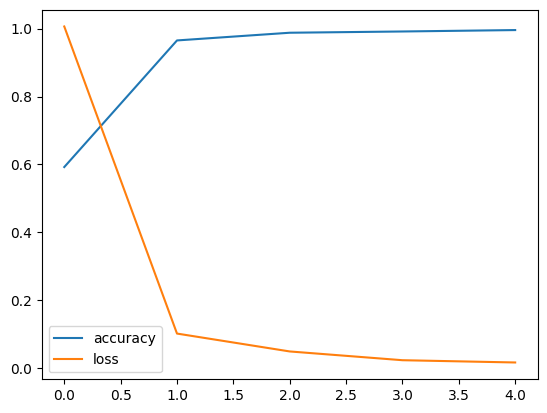

In [16]:
#Dibujamos el proceso de entrenamiento
plt.plot(h.history['accuracy'], label='accuracy')
plt.plot(h.history['loss'], label='loss')
plt.legend()

plt.show()

In [17]:
# Creacion de modelo de tipo secuencial
modeloResizing = Sequential()

# Le añadimos una capa de tipo resizing (Sirve para cambiar el tamaño de las imagenes)
modeloResizing.add(Resizing(height=128,width=128,crop_to_aspect_ratio=False,interpolation='bicubic'))

AxesImage(shape=(683, 910, 3))


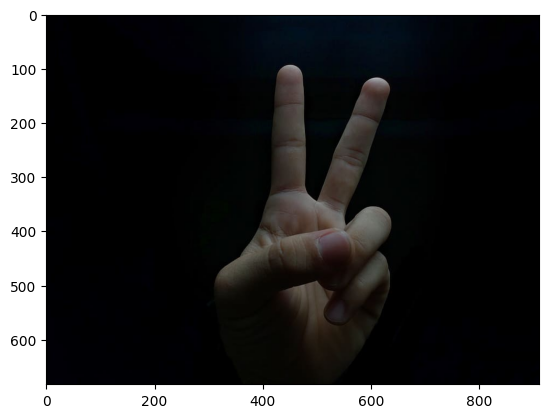

In [23]:
# Url de la imagen
url = 'https://p2.piqsels.com/preview/452/37/134/hands-two-fingers-index-finger-the-middle-finger.jpg'

# Hacemos la peticion a la url y la guardamos
response = requests.get(url)

# Cargamos la imagen incluida en la respuesta del servidor
imagen = Image.open(BytesIO(response.content))

# La convertimos en un array de numpy
imagen = np.array(imagen)

# Le cambiamos el shape a uno compatible con la red neuronal del modelo del ejercicio 10 (X,X,1) tienes que ponerle el 1
imagen = imagen.reshape(imagen.shape[0],imagen.shape[1],3)

# Se muestra la imagen original en escala de grises
print(plt.imshow(imagen))


In [24]:
# Se le pasa la imagen al modelo que hemos creado y reduce el tamaño de la imagen
X_prueba = modeloResizing(imagen)

In [25]:
# # Al pasarla por la red neuronal la imagen ya no es un array de numpy asi que hay que volver a convertila
X_prueba = np.array(X_prueba)

# # Se divide entre 255 porque las redes neuronales usan valores de 0 a 1 y 255 es el maximo valor que puede alcanzar cada pixel
X_prueba = X_prueba/255

# # Se le hace un reshape porque para hacer un predict hay que indicar el numero de imagenes que le vamos a pasar al modelo de ejercicio 10, asea ser 1 imagen
X_prueba = X_prueba.reshape(1,128,128,3)

In [26]:
# Hacemos una prediccion pasandole la X
pred = model.predict(X_prueba,verbose=False)

# El argmax hace que te devuelva la posicion de la prediccion cuyo valor es el mayor
tipo = np.argmax(pred)

# Mostramos la prediccion
print('En la foto hay',tipo,'dedos')
print(pred)

En la foto hay 2 dedos
[[0.00911116 0.12533122 0.8221273  0.02218788 0.00087845 0.02036398]]


In [ ]:
# Guardo el modelo para no tener que entrenarlo cada vez que lo quiera usar
model.save('modelo_dedos.h5')